In [1]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

In [2]:
from pathlib import Path

IMAGES_PATH = Path() / "images" / "unsupervised_learning"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Unsupervised Learning Techniques

Other than dimensionality reduction, the following are other common unsupervised tasks:
- Clustering: Grouping similar instances together into cluster and great tool for data analysis, customer segmentation, recommender systems, search engines, image segmentation, semi-supervised learning and dimensionality reduction, etc.

- Anomaly detection (outlier detection): Useful for fraud detection, detecting defective products in manufacturing, identifying new trends in time series, or removing outliers from a dataset before training another model (possibly improving the performance of the resulting model)

- Density Estimation: Estimating *probability density function* of the random process that generated the dataset. Commonly used for anomaly detection. very instances located in very low density regions are likely to be anomalies. It can also be used for data analysis and visualization.

## Clustering Algorithms

aka identifying similar instances and assigning them to clusters, or groups of similar instances.

Below is an example of the iris dataset on both labeled and unlabeled dataset.

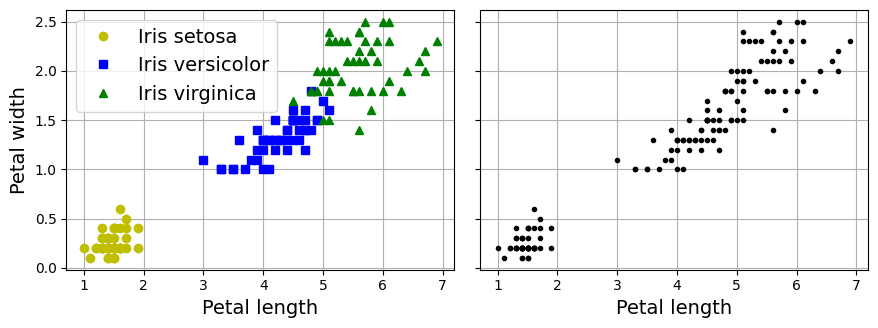

In [3]:
# extra code – this cell generates and saves Figure 9–1

import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

data = load_iris()
X = data.data
y = data.target
data.target_names

plt.figure(figsize=(9, 3.5))

plt.subplot(121)
plt.plot(X[y==0, 2], X[y==0, 3], "yo", label="Iris setosa")
plt.plot(X[y==1, 2], X[y==1, 3], "bs", label="Iris versicolor")
plt.plot(X[y==2, 2], X[y==2, 3], "g^", label="Iris virginica")
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.grid()
plt.legend()

plt.subplot(122)
plt.scatter(X[:, 2], X[:, 3], c="k", marker=".")
plt.xlabel("Petal length")
plt.tick_params(labelleft=False)
plt.gca().set_axisbelow(True)
plt.grid()

save_fig("classification_vs_clustering_plot")
plt.show()

Use cases for clustering includes (but not limited to):

1. Customer segmentation<br>
Useful in recommender systems to suggest content that other users in the same cluster enjoyed.

2. Data Analysis<br>

3. Dimensionality reduction <br>
After a dataset has been clustered, we can measure each instance's *affinity* with eaech cluster; where it is a measure of how well an instance fits into a cluster. Then we can convert the feature vector with the vector of its cluster *affinities*, which will usually be much lower dimensional than the original feature vector and preserve enough information for further processing.

4. Feature Engineering<br>
Useful as extra features (k-means to add geographic cluster affinity features to the California housing dataset in chap2)

5. Anomaly detection<br>
Instances with low affinity to all clusters

6. Semi-supervised learning<br>
Technique that vcan be used when there are few labels and can greatly increase the number of labels available for a subsequent supervised learning algorithm

7. Search engines<br>
Create clusters with existing images and then find the cluster nearest to a new reference image.

8. Image segmentation<br>
Cluster pixels according to their color and replace each pixel's color with the mean color of its cluster to considerably reduce the number of different colors in an image. This can be used for object detection, tracking systems, etc to detect the countour of each object.

As there is no universal definition of what a cluster is, it can be centered around a particular point (*centroid*) or it can be a continuous region of densely packed instances and take on any shape.

### k-means

first published in 1957 for Bell Labs as a technique for pulse-code modulation, but only published outside in 1982.

In [9]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import numpy as np 

blob_centers = np.array([[ 0.2,  2.3], [-1.5 ,  2.3], [-2.8,  1.8],
                         [-2.8,  2.8], [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])
X, y = make_blobs(n_samples=2000, centers=blob_centers, cluster_std=blob_std,
                  random_state=42)

k = 5 # number of clusters must be specified!
kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
y_pred = kmeans.fit_predict(X)

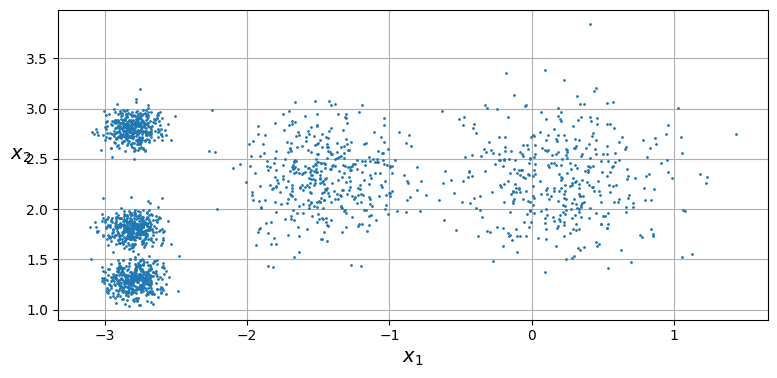

In [10]:
# extra code – this cell generates and saves Figure 9–2

def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$", rotation=0)

plt.figure(figsize=(8, 4))
plot_clusters(X)
plt.gca().set_axisbelow(True)
plt.grid()
save_fig("blobs_plot")
plt.show()

In [11]:
kmeans.cluster_centers_

array([[-2.80372723,  1.80873739],
       [ 0.20925539,  2.30351618],
       [-2.79846237,  2.80004584],
       [-1.4453407 ,  2.32051326],
       [-2.79244799,  1.2973862 ]])

In [12]:
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])
kmeans.predict(X_new)

array([1, 1, 2, 2], dtype=int32)

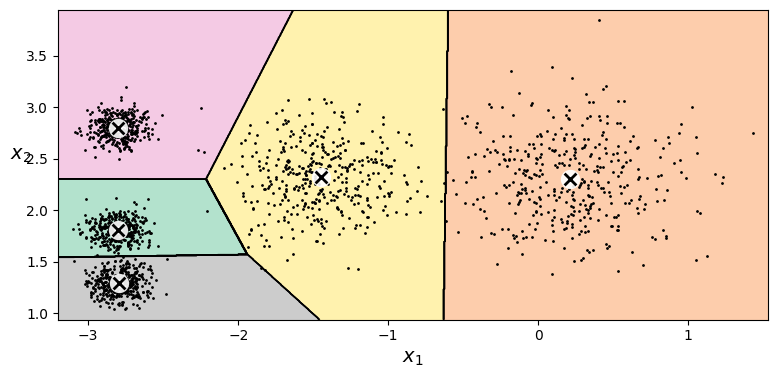

In [13]:
# extra code – this cell generates and saves Figure 9–3

def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$")
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", rotation=0)
    else:
        plt.tick_params(labelleft=False)

plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X)
save_fig("voronoi_plot")
plt.show()

Above is the cluster's decision boundaries, also known as Voronoi tesselation.

Observe that a vast majority of instance were clearly assigned to the appropriate cluster, but a few instances were probably mislabeled, especially near the boundary between the top-left and central cluster.

Hence, rather than assigning each instance to a single cluster (*hard clustering*), we can give each instance a score per cluster (*soft clustering*) where the score can be the distance between the instance and the centroid or a similarity score (or affinity), such as the Gaussian radial basis function.

We can do this using the `transform()` method. Through this method, we can transform a high dimensional dataset into a k-deimensional dataset and can be a very efficient nonlinear dimensionality reduction technique.

In [14]:
kmeans.transform(X_new).round(2)

array([[2.81, 0.37, 2.91, 1.48, 2.88],
       [5.81, 2.81, 5.85, 4.46, 5.83],
       [1.21, 3.28, 0.28, 1.7 , 1.72],
       [0.72, 3.22, 0.36, 1.56, 1.22]])

In [15]:
# extra code to verify that this is indeed 
# the Euclidian distance between each instance and each centroid:
np.linalg.norm(np.tile(X_new, (1, k)).reshape(-1, k, 2)
               - kmeans.cluster_centers_, axis=2).round(2)

array([[2.81, 0.37, 2.91, 1.48, 2.88],
       [5.81, 2.81, 5.85, 4.46, 5.83],
       [1.21, 3.28, 0.28, 1.7 , 1.72],
       [0.72, 3.22, 0.36, 1.56, 1.22]])

Note that while the k-means algorithm is guaranteed to converge, it may not necessarily converge to the right solution (i.e. it may converge to a local optimum)

In [ ]:
# to initialize approximate centroids
good_init = np.array([[-3, 3], [-3, 2], [-3, 1], [-1, 2], [0, 2]])
kmeans = KMeans(n_clusters=5, init=good_init, n_init=1, random_state=42)
kmeans.fit(X)

KMeans(init=array([[-3,  3],
       [-3,  2],
       [-3,  1],
       [-1,  2],
       [ 0,  2]]),
       n_clusters=5, n_init=1, random_state=42)

By default the kmeans algorithm runs the algorithm for 10 times and then keeps the best solution.

The best solution is measure by the performance metrix *inertia*, which is the sum of the squared distances between the instances and their closest centroids.

In [17]:
kmeans.inertia_

213.4217713125891

#### Accelerated k-means and mini-batch k-means

Accelerated -> avoiding many unnecessary distance calculations by exploiting the triangle inequality and keeping track of lower and uppwer bounds for distnace between instances and centroids (not guaranteed to accelerate training). Activated thorugh `algorithm = "elkan"`

mini-batch -> use mini-batches under each iteration. This speeds up the algorithm (typically by a factor of 3-4) and makes it possible to cluster huge datasets that do not fit in memory.

In [18]:
from sklearn.cluster import MiniBatchKMeans

minibatch_kmeans = MiniBatchKMeans(n_clusters = 5, random_state = 42)
minibatch_kmeans.fit(X)

MiniBatchKMeans(n_clusters=5, random_state=42)

100/100

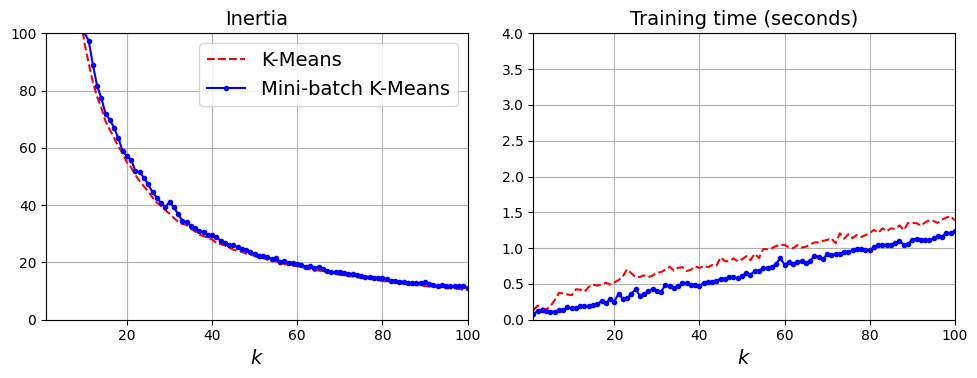

In [19]:
# extra code – this cell generates and saves Figure 9–6

from timeit import timeit

max_k = 100
times = np.empty((max_k, 2))
inertias = np.empty((max_k, 2))
for k in range(1, max_k + 1):
    kmeans_ = KMeans(n_clusters=k, algorithm="lloyd", n_init=10, random_state=42)
    minibatch_kmeans = MiniBatchKMeans(n_clusters=k, n_init=10, random_state=42)
    print(f"\r{k}/{max_k}", end="")  # \r returns to the start of line
    times[k - 1, 0] = timeit("kmeans_.fit(X)", number=10, globals=globals())
    times[k - 1, 1] = timeit("minibatch_kmeans.fit(X)", number=10,
                             globals=globals())
    inertias[k - 1, 0] = kmeans_.inertia_
    inertias[k - 1, 1] = minibatch_kmeans.inertia_

plt.figure(figsize=(10, 4))

plt.subplot(121)
plt.plot(range(1, max_k + 1), inertias[:, 0], "r--", label="K-Means")
plt.plot(range(1, max_k + 1), inertias[:, 1], "b.-", label="Mini-batch K-Means")
plt.xlabel("$k$")
plt.title("Inertia")
plt.legend()
plt.axis([1, max_k, 0, 100])
plt.grid()

plt.subplot(122)
plt.plot(range(1, max_k + 1), times[:, 0], "r--", label="K-Means")
plt.plot(range(1, max_k + 1), times[:, 1], "b.-", label="Mini-batch K-Means")
plt.xlabel("$k$")
plt.title("Training time (seconds)")
plt.axis([1, max_k, 0, 4])
plt.grid()

save_fig("minibatch_kmeans_vs_kmeans_plot")
plt.show()

Mini-batch kmeans has a higher inertia than kmeans(left) but it is much faster (right), especially as k increases. (mini-batch improvement is not that substantial could be because of my laptop setup?)

#### Finding the optimal number of clusters

Inertia is not the best metric to use to measure the optimal number of clusters, but if we plot the interia as a function of k, then we can pick the point where there is an inflexion point (*elbow*)

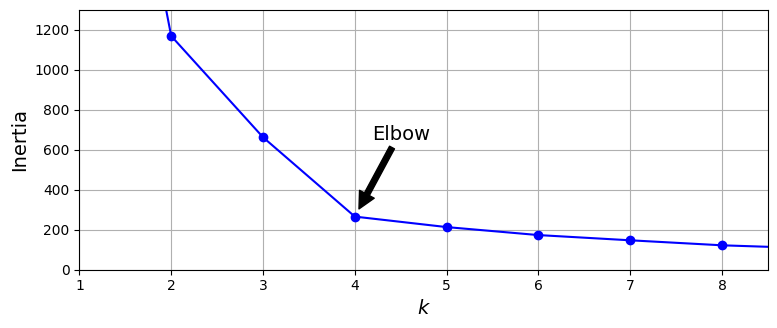

In [21]:
# extra code – this cell generates and saves Figure 9–8

kmeans_per_k = [KMeans(n_clusters=k, n_init=10, random_state=42).fit(X)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$")
plt.ylabel("Inertia")
plt.annotate("", xy=(4, inertias[3]), xytext=(4.45, 650),
             arrowprops=dict(facecolor='black', shrink=0.1))
plt.text(4.5, 650, "Elbow", horizontalalignment="center")
plt.axis([1, 8.5, 0, 1300])
plt.grid()
save_fig("inertia_vs_k_plot")
plt.show()

If we did not know better, we would pick k = 4.

A more precise approach is using the *silhoutte score*, which is the mean *silhoutte coefficient* over all the instances.
An instance' silhoutte is $(b-a) / max(a,b)$ where
- $a$ is the mean distance to the other instances in the same cluster (aka mean intra-cluster distance), and
- $b$ is the mean nearest cluster distance (aka mean distance to the instances of the next closest cluster, defined as the one that minimizes $b$, excluding the instance's own cluster)

Silhoutte score varies between -1 and +1. Close to +1 means that the instance is well inside its own cluster and far from other clusters. 0 means that it is close to a cluster boundary, while -1 means that the instance may have been assigned to the wrong cluster.

In [22]:
from sklearn.metrics import silhouette_score
silhouette_score(X, kmeans.labels_)

np.float64(0.656578194104489)

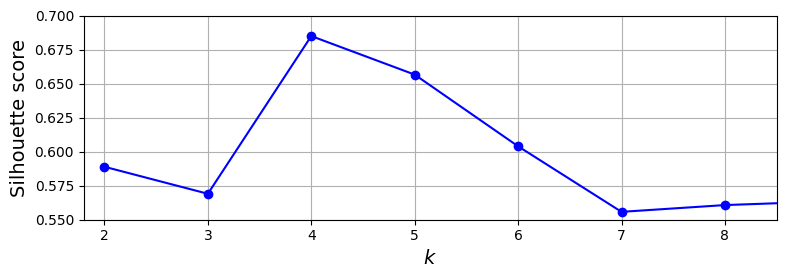

In [23]:
# extra code – this cell generates and saves Figure 9–9

silhouette_scores = [silhouette_score(X, model.labels_)
                     for model in kmeans_per_k[1:]]

plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$")
plt.ylabel("Silhouette score")
plt.axis([1.8, 8.5, 0.55, 0.7])
plt.grid()
save_fig("silhouette_score_vs_k_plot")
plt.show()

The silhoutte score (as a function of k clusters) seems to show that k=4 is a good choice, but that k=5 is quite good as well.

We can also plot every instance's silhoutte coefficient, sorted by the clusters they are assigned to and by the value of the coefficient (aka *silhoutte diagram*). Each diagram contains 1 knife shape per cluster. The shape's height indicates the number of instances in the cluster and width represents the sorted silhouette coefficients of the instaces in the cluster (wider is better).

The vertical dashed lines is the mean silhoutte score for each number of clusters. Whenmost of the instances in a cluster have a low coefficient than this score, then the cluster is rather bad since this means its instances are much too close to other clusters. 

We observe that k=3 or 6 are bad clusters, while k = 4 or 5 looks pretty good. We observe that cluster 1 under k=4 is rather big, while k=5 clusters have similar sizes. So even though k=4 overall silhoutte score from k=4 is slightly greater than for k=5, it seems like a good idea to use k=5 to get clusters of similar sizes!

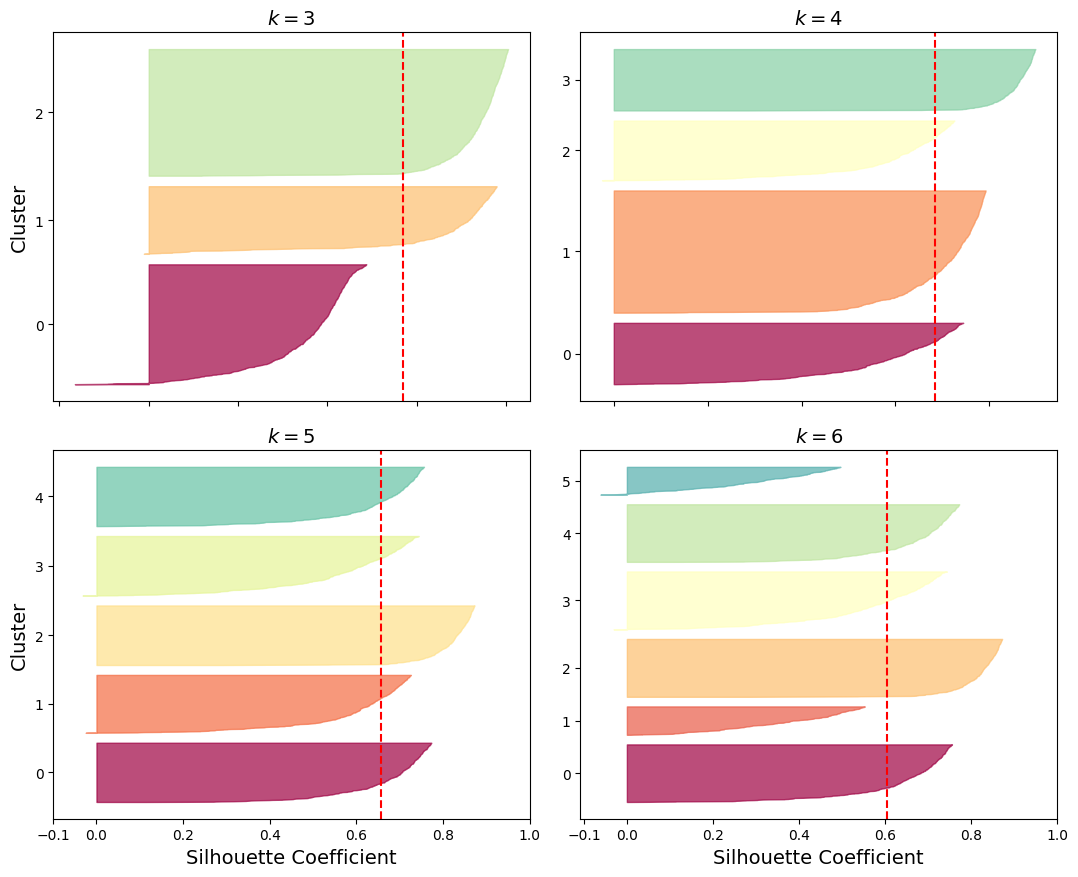

In [24]:
# extra code – this cell generates and saves Figure 9–10

from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter

plt.figure(figsize=(11, 9))

for k in (3, 4, 5, 6):
    plt.subplot(2, 2, k - 2)
    
    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(X, y_pred)

    padding = len(X) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = plt.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster")
    
    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title(f"$k={k}$")

save_fig("silhouette_analysis_plot")
plt.show()

### Limits of k-means

- Necessity to run the algorithm several times to avoid suboptimal solutions + also need to specify the number of clusters.
- Doesn't behave well for clusters with varying sizes, different densities or nonspherical shapes (seen below). On these types of elliptical clusters, Gaussian mixture models will work great.

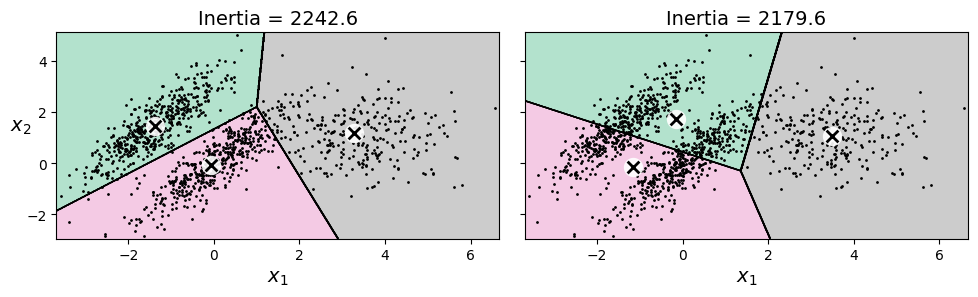

In [25]:
# extra code – this cell generates and saves Figure 9–11

X1, y1 = make_blobs(n_samples=1000, centers=((4, -4), (0, 0)), random_state=42)
X1 = X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))
X2, y2 = make_blobs(n_samples=250, centers=1, random_state=42)
X2 = X2 + [6, -8]
X = np.r_[X1, X2]
y = np.r_[y1, y2]

kmeans_good = KMeans(n_clusters=3,
                     init=np.array([[-1.5, 2.5], [0.5, 0], [4, 0]]),
                     n_init=1, random_state=42)
kmeans_bad = KMeans(n_clusters=3, n_init=10, random_state=42)
kmeans_good.fit(X)
kmeans_bad.fit(X)

plt.figure(figsize=(10, 3.2))

plt.subplot(121)
plot_decision_boundaries(kmeans_good, X)
plt.title(f"Inertia = {kmeans_good.inertia_:.1f}")

plt.subplot(122)
plot_decision_boundaries(kmeans_bad, X, show_ylabels=False)
plt.title(f"Inertia = {kmeans_bad.inertia_:.1f}")

save_fig("bad_kmeans_plot")
plt.show()

In addition, remember to scale the input features or the clusters may be very stretched and k-means will perform poorly. While it will not guarantee that all the clusters will be nice and spherical, it generally helps k-means.

### Using Clustering for Image Segmentation

*Image segmentation* is the task of **partitioning** an image into multiple segments. Below are its variants: 

- Color Segmentation <br>
Pixels with similar color get assigned to the same segment.
e.g. Analyzing satellite images to measure how much total forest area there is in a region.

- Semantic segmentation <br>
All pixels that are part of the same object type get assigned to the same segment. e.g. Self-driving car's vision system, all pixels that are part of a pedestrian's image might be assigned to the "pedestrian" segment (1 segment containing all the pedestrians)

- Instance segmentation <br>
Pixels that are part of the same individual object are assigned to the same segment. i.e. different segment for each pedestrian.

Both semantic or instance segmentation today is achieved using CNN (Convolutional Neural Networks). Color segmentation meanwhile can be done using k-means.


In [28]:
import urllib.request

homl3_root = "https://github.com/ageron/handson-ml3/raw/main/"
filename = "ladybug.png"
filepath = IMAGES_PATH / filename
if not filepath.is_file():
    print("Downloading", filename)
    url = f"{homl3_root}/images/unsupervised_learning/{filename}"
    urllib.request.urlretrieve(url, filepath)

In [29]:
import PIL

image = np.asarray(PIL.Image.open(filepath))
image.shape

(533, 800, 3)

- 1st Dimension = Height
- 2nd Dimension = Width
- 3rd Dimension = Color channel (R, G, B)<br>
Note that some images have fewer channels (grayscale), more channels (alpha channel for transparency, or satellite images containing channels for additional light frequencies)

In [30]:
# Reshaping the array to get a long list of RGB colors
X = image.reshape(-1,3)
# Then clusters these colors using k-means with 8 clusters.
kmeans = KMeans(n_clusters = 8, random_state = 42).fit(X)
# Array containing nearest cluster center for each pixel
segmented_img = kmeans.cluster_centers_[kmeans.labels_]
# Reshapes this array to the original image shape
segmented_img = segmented_img.reshape(image.shape)

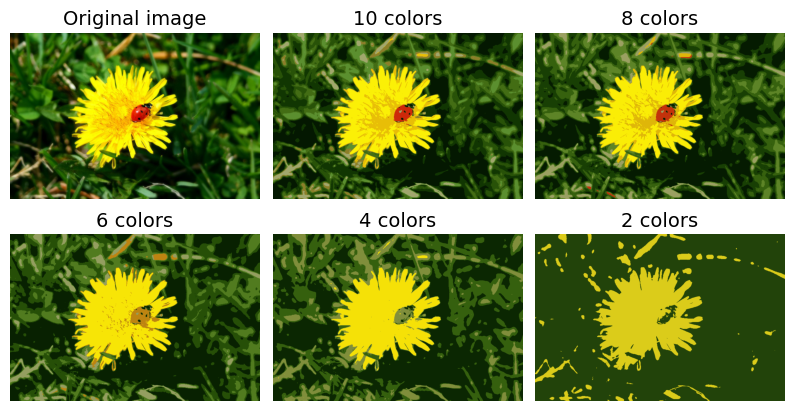

In [31]:
# extra code – this cell generates and saves Figure 9–12

segmented_imgs = []
n_colors = (10, 8, 6, 4, 2)
for n_clusters in n_colors:
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=42).fit(X)
    segmented_img = kmeans.cluster_centers_[kmeans.labels_]
    segmented_imgs.append(segmented_img.reshape(image.shape))

plt.figure(figsize=(10, 5))
plt.subplots_adjust(wspace=0.05, hspace=0.1)

plt.subplot(2, 3, 1)
plt.imshow(image)
plt.title("Original image")
plt.axis('off')

for idx, n_clusters in enumerate(n_colors):
    plt.subplot(2, 3, 2 + idx)
    plt.imshow(segmented_imgs[idx] / 255)
    plt.title(f"{n_clusters} colors")
    plt.axis('off')

save_fig('image_segmentation_plot', tight_layout=False)
plt.show()

### Using Clustering for Semi-supervised Learning

When we have plenty of unlabeled instance and very few labeled instances.

In [48]:
from sklearn.datasets import load_digits

X_digits, y_digits = load_digits(return_X_y=True)
X_train, y_train = X_digits[:1400], y_digits[:1400]
X_test, y_test = X_digits[1400:], y_digits[1400:]

In [49]:
# Pretend that we only have labels for 50 instances

from sklearn.linear_model import LogisticRegression

n_labeled = 50
log_reg = LogisticRegression(max_iter=10_000)
log_reg.fit(X_train[:n_labeled], y_train[:n_labeled])

LogisticRegression(max_iter=10000)

In [50]:
log_reg.score(X_test, y_test)

0.7581863979848866

In [51]:
# extra code – measure the accuracy when we use the whole training set
log_reg_full = LogisticRegression(max_iter=10_000)
log_reg_full.fit(X_train, y_train)
log_reg_full.score(X_test, y_test)

0.9093198992443325

In [42]:
k = 50
kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
X_digits_dist = kmeans.fit_transform(X_train)
representative_digit_idx = X_digits_dist.argmin(axis=0)
X_representative_digits = X_train[representative_digit_idx]

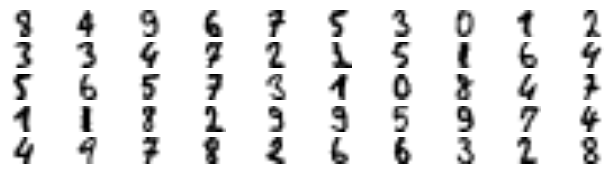

In [43]:
# extra code – this cell generates and saves Figure 9–13

plt.figure(figsize=(8, 2))
for index, X_representative_digit in enumerate(X_representative_digits):
    plt.subplot(k // 10, 10, index + 1)
    plt.imshow(X_representative_digit.reshape(8, 8), cmap="binary",
               interpolation="bilinear")
    plt.axis('off')

save_fig("representative_images_plot", tight_layout=False)
plt.show()

In [52]:
y_representative_digits = np.array([
    8, 4, 9, 6, 7, 5, 3, 0, 1, 2,
    3, 3, 4, 7, 2, 1, 5, 1, 6, 4,
    5, 6, 5, 7, 3, 1, 0, 8, 4, 7,
    1, 1, 8, 2, 9, 9, 5, 9, 7, 4,
    4, 9, 7, 8, 2, 6, 6, 3, 2, 8
])

In [53]:
log_reg = LogisticRegression(max_iter=10_000)
log_reg.fit(X_representative_digits, y_representative_digits)
log_reg.score(X_test, y_test)

0.8387909319899244

Observe that the score has now improved from 75% to 84%

In [55]:
# propagate the labels to all other instances in the same cluster

y_train_propagated = np.empty(len(X_train), dtype=np.int64)
for i in range(k):
    y_train_propagated[kmeans.labels_ == i] = y_representative_digits[i]

In [56]:
log_reg = LogisticRegression(max_iter=10_000)
log_reg.fit(X_train, y_train_propagated)

LogisticRegression(max_iter=10000)

In [57]:
log_reg.score(X_test, y_test)

0.8589420654911839

The model improved from 84% to 86%. Not significant, but still an improvement.

In [58]:
percentile_closest = 99

# takes the distance of each data to its respective cluster
X_cluster_dist = X_digits_dist[np.arange(len(X_train)), kmeans.labels_]

for i in range(k):
    in_cluster = (kmeans.labels_ == i)
    cluster_dist = X_cluster_dist[in_cluster]
    cutoff_distance = np.percentile(cluster_dist, percentile_closest)
    above_cutoff = (X_cluster_dist > cutoff_distance)
    X_cluster_dist[in_cluster & above_cutoff] = -1

partially_propagated = (X_cluster_dist != -1)
X_train_partially_propagated = X_train[partially_propagated]
y_train_partially_propagated = y_train_propagated[partially_propagated]

In [59]:
log_reg = LogisticRegression(max_iter=10_000)
log_reg.fit(X_train_partially_propagated, y_train_partially_propagated)
log_reg.score(X_test, y_test)

0.8564231738035264

In this case, the accuracy actually decreased.

In [61]:
# we note that the label propagation
# is actually quite accurate in this case at 95% accuracy
(y_train_partially_propagated == y_train[partially_propagated]).mean()

np.float64(0.9548148148148148)

Sklearn also offers 2 classes for label propagation under `sklearn.semi_supervised`
1. `LabelSpreading`
2. `LabelPropataion`

Both classes construct a similarity matrix between all instances, and iteratively propagate labels from labeled instance to similar unlabeled instances. There is also `SelfTrainingClassifier`. When given a base classifier (eg. random forest), it trains it on the labeled instances, the nuses it to predict labels for the unlabeled samples. Then it updates the training set with the labels it is most confident about, and repeats this process of training and labeling until it cannot add labels anymore.

There is also the concept of *active learning*, where human expert interactis with the learning algorithm and provieds labels for specific instances when the algorithm requests them. Specifically,

1. The model is trained on the labeled instances gathered so far, and this model is used to make predictions on all the unlabeled instances.
2. The instances for which the model is most uncertain (i.e., where its estimated probability is lowest) are given to the expert for labeling.
3. You iterate this process until the performance improvement stops being worth the labeling effort.


Other active learning strategies include labeling the instances that would result in the largest model change or the largest drop in the model’s validation error, or the instances that different models disagree on (e.g., an SVM and a random forest).

### DBSCAN

The *density-based spatial clustering of applications with noise* defines clusters as continuous regions of high density.

- For each instance, the algorithm counts how many instances are located within a small distance $ε$ from it. This region is called the instances's $ε-neighborhood$.
- If an instance has at least `min_samples` instanes in its ε-neighborhood (including itself), then it is considered as a *core instances* (located in dense regions).
- All instances in the neighborhood of a core instance belong to the same cluster. This neighborhood may include other core instancesl therefore a long sequence of neighboring core instances forms a single cluster.
- All instance that is not a core instance and does not have one in its neighborhood is considered an **anomaly**.

The algorithm works well if all the clusters are well separated by low-density regions.

In [62]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=1000, noise= 0.05)
dbscan = DBSCAN(eps = 0.05, min_samples=5)
dbscan.fit(X)

DBSCAN(eps=0.05)

In [63]:
dbscan.labels_

array([ 0,  1,  0, -1,  2,  0,  0,  3, -1,  3, -1, -1,  4,  5, -1,  6,  0,
        7,  8,  8,  3,  9,  9,  6,  5, 10,  5,  4,  2,  1,  1,  8,  0,  9,
        8,  6,  9,  3, 10,  8,  2,  5,  3, 10,  5,  5,  1,  2,  9,  8, 10,
        3,  0,  5,  5, -1,  0,  8,  2,  2,  1,  5,  0,  5,  1,  0,  8,  5,
       10,  3,  5,  1,  2,  5,  0,  1,  9,  7, -1,  9,  3,  8,  0,  2, -1,
        4,  0,  8,  6,  0,  5,  5,  6,  9,  0,  9,  9,  4,  8, -1,  5,  0,
        6,  1,  5,  9,  0,  9,  5,  5, -1,  5, 11,  0,  5,  5,  7,  1,  9,
        5, 12,  5,  8,  9,  3,  5,  5,  8,  3,  4,  3,  9,  3,  0,  5,  9,
        9,  9,  7,  7, -1,  8,  5,  5,  5,  5,  7,  6,  5,  8,  5,  5, 10,
        1,  1,  5,  5,  2, -1,  2,  1,  8,  7,  5, 14,  3, 10,  8, -1,  9,
        1,  5,  8,  9,  5,  8,  0,  3,  8,  8,  2,  3,  5,  8,  5,  7,  2,
        3, -1,  5, 12,  5,  5,  5,  2,  0,  8, 10, -1,  5,  8,  0, 11,  0,
        5,  5,  5, -1,  3,  5, -1,  8, 10,  4,  8,  5,  4, -1,  5,  0,  9,
        7, -1,  5,  5,  8

-1 cluster index are considered as anomalies by the algorithm. The indicies of the core instance is available under `core_sample_indices_` instance variable, and the core instnaces themselves are available in the `components_` instance variable.

In [68]:
dbscan.core_sample_indices_

array([  0,   1,   2,   4,   5,   7,   9,  12,  13,  15,  16,  17,  18,
        20,  21,  22,  23,  24,  25,  26,  27,  28,  29,  30,  31,  32,
        33,  34,  35,  36,  37,  38,  39,  40,  41,  42,  43,  44,  45,
        46,  47,  48,  49,  50,  51,  52,  53,  54,  56,  57,  58,  59,
        60,  61,  62,  63,  64,  66,  67,  68,  69,  70,  71,  73,  74,
        75,  76,  77,  79,  83,  85,  86,  87,  88,  90,  91,  93,  94,
        95,  97,  98, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109,
       111, 112, 113, 114, 115, 116, 118, 119, 120, 122, 123, 124, 125,
       127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139,
       141, 142, 143, 144, 146, 147, 148, 149, 150, 151, 152, 153, 154,
       155, 156, 157, 159, 160, 161, 162, 163, 165, 166, 167, 169, 170,
       171, 172, 173, 174, 176, 177, 178, 179, 180, 181, 182, 183, 184,
       186, 187, 189, 190, 191, 192, 193, 194, 195, 196, 197, 199, 200,
       202, 204, 205, 206, 208, 209, 211, 212, 213, 214, 215, 21

In [65]:
dbscan.components_

array([[-0.47117557,  0.95762674],
       [ 0.04490811,  0.13401982],
       [-0.25688462,  0.96738109],
       ...,
       [ 2.02237246,  0.2342754 ],
       [ 0.12715191,  0.9305451 ],
       [ 1.84186286, -0.01775543]], shape=(797, 2))

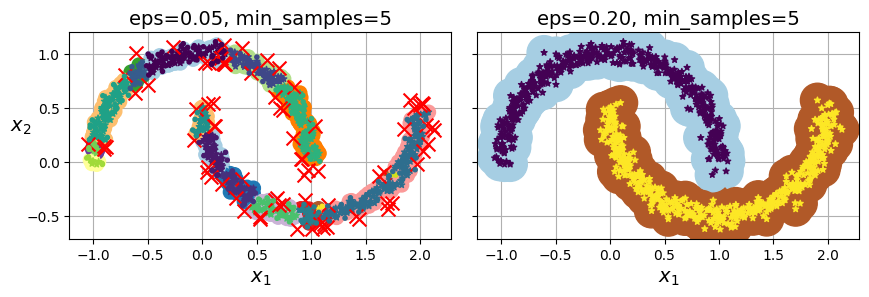

In [69]:
# extra code – this cell generates and saves Figure 9–14

def plot_dbscan(dbscan, X, size, show_xlabels=True, show_ylabels=True):
    core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True
    anomalies_mask = dbscan.labels_ == -1
    non_core_mask = ~(core_mask | anomalies_mask)

    cores = dbscan.components_
    anomalies = X[anomalies_mask]
    non_cores = X[non_core_mask]
    
    plt.scatter(cores[:, 0], cores[:, 1],
                c=dbscan.labels_[core_mask], marker='o', s=size, cmap="Paired")
    plt.scatter(cores[:, 0], cores[:, 1], marker='*', s=20,
                c=dbscan.labels_[core_mask])
    plt.scatter(anomalies[:, 0], anomalies[:, 1],
                c="r", marker="x", s=100)
    plt.scatter(non_cores[:, 0], non_cores[:, 1],
                c=dbscan.labels_[non_core_mask], marker=".")
    if show_xlabels:
        plt.xlabel("$x_1$")
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", rotation=0)
    else:
        plt.tick_params(labelleft=False)
    plt.title(f"eps={dbscan.eps:.2f}, min_samples={dbscan.min_samples}")
    plt.grid()
    plt.gca().set_axisbelow(True)

dbscan2 = DBSCAN(eps=0.2)
dbscan2.fit(X)

plt.figure(figsize=(9, 3.2))

plt.subplot(121)
plot_dbscan(dbscan, X, size=100)

plt.subplot(122)
plot_dbscan(dbscan2, X, size=600, show_ylabels=False)

save_fig("dbscan_plot")
plt.show()

DBSCAN cannot predict which cluster a new instance belongs to, and so a different classification algorithm will need to be used.

In [73]:
dbscan = dbscan2  # extra code – the text says we now use eps=0.2

In [74]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(dbscan.components_, dbscan.labels_[dbscan.core_sample_indices_])
# dbscan.labels_[dbscan.core_sample_indices_]
# find the labels for the core instances (all the non -1 indices)

KNeighborsClassifier(n_neighbors=50)

In [75]:
X_new = np.array([[-0.5, 0], [0, 0.5], [1, -0.1], [2, 1]])
knn.predict(X_new)

array([0, 1, 0, 1])

In [76]:
knn.predict_proba(X_new)

array([[0.88, 0.12],
       [0.  , 1.  ],
       [0.78, 0.22],
       [0.  , 1.  ]])

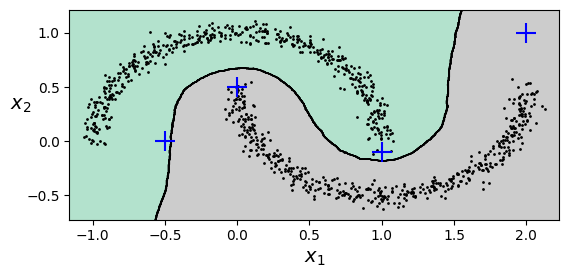

In [77]:
# extra code – this cell generates and saves Figure 9–15

plt.figure(figsize=(6, 3))
plot_decision_boundaries(knn, X, show_centroids=False)
plt.scatter(X_new[:, 0], X_new[:, 1], c="b", marker="+", s=200, zorder=10)
save_fig("cluster_classification_plot")
plt.show()

The crosses represent the 4 instances in X_new.

Notice that since there are no anomaly in the training set, the classifiers always chooses a cluster, even when that cluster is far away. To introduce a maximum distance (where 2 instances that are far away from both clusters are classified as anomalies), use the `kneighbors()` method of the `KNeighborsClassifier`. Given a set of instances, it returns the distances and the indices of the k-nearest neighbors in the training set (2 matrices, each with k-column).

In [78]:
y_dist, y_pred_idx = knn.kneighbors(X_new, n_neighbors=1)
y_pred = dbscan.labels_[dbscan.core_sample_indices_][y_pred_idx]
y_pred[y_dist > 0.2] = -1
y_pred.ravel()

array([-1,  1,  0, -1])

DBSCAN is robust to oultiers and has just 2 hyperparameters (`eps` and `min_samples`). If the density varies significantly across the clusters, however, or if there's no sufficiently low-density region around some clusters, DBSCAN can struggle to capture all the clusters properly. Complexity -> O($m^2n$) so it does not scale well to large datasets.

Also try the *hierarchical DBSCAN* (HDBSCAN) under the `scikit-learn-contrib` as it is usually better than DBSCAN at finding clusters of varying densities.

### Other Clustering Algorithms

- Agglomerative Clustering (hierarchical clustering) <br>
Hierarchy of clusters built from the bottom up. At each iteration, it will connect the nearest pair of clusters. This approach can capture clusters of various shapes and produces a flexible and informative cluster tree instead of forcing the user to provide a particular cluster scale, and can be used for any pairwise distance (*linkage*). Scales nicely to large numberes of instaces if a connectivity matrix is provided (sparse m x m matrix that indicates which pair of instances are neighbors). Without it, it doesn't scale well to large datasets.

- BIRCH <br>
*Balanced Iterative Reducing and Clustering using Hierarchies* is designed for very large datasets and can be faster than batch k-means, with similar results as long as the number of features is not too large (< 20). During training, it builds a tree structure containing just enough information to quickly assign each new instance to a cluster, without having to store all the instances in the tree (hence uses limited memory).

- Mean-Shift <br>
Starts by placing a circle centered on each instance, then for each circle, compute the mean of all the instances located within it, then it shifts the circle so that it is centered on the mean. Then it iterates this mean-shifting step until all the circles stop moving. This algorithm shifts the circles in the direction of high density, until each of them has found a local density maximum. Finally all the instances whose circles have settled in the same place are assigned to the same cluster. Similar to DBSCAN (find any number of clusters of any shape, very few parameters i.e. `bandwidth` / radius of the cirlces, and relies on local density estimation). However it tends to chop clusters into pieces when they have internal density variations. Complexity of O($m^2n$) means it is not suited for large datasets.

- Affinity Propagation <br>
Instances repeatedly exchange messages between one antoher until every instance has elected another instance (or itself) to represent it (called *exemplars*). Each exemplar and all the instances that elected it form one cluster. This works similarly when you want to vote for a candidate whose opinions are similar to yours but choose a candidate who is more popular (but not necessarily agree with), hence will tend to choose exemplars located near the center of the clusters, similar to k-means. But unlike k-means, we don't need to pick a number of clusters ahead of time (determined during training). It can also deal with clusters of different sizes. The complexity of O($m^2$) is not suited to large dataset.

- Spectral Clustering <br>
Takes similarity matrix between instances and creates a low-dimensional embedding (i.e reduces the matrix's dimensionality), then uses another clustering algorithm in this low-dimensional space (Scikit uses k-means). It can capture complex cluster structures and can be used to cut graphs (e.g. identify clusters of friends on a social network). Doesn't scale well to large numbers of instances and doesn't behave well when clusters have very different sizes.

## Gaussian Mixtures

Probabilistic model that assume that the instanes were generated from a mixture of several Gaussian distributions whose parameters are unknown. All the instances generated from a single Gaussian distirbution form a cluster that typically looks like an ellipsoid, where each cluster can have a different ellipsoidal shape, size, density and orientation.

There are several GMM variants under the `GaussianMixture` class and the number `k` of Gaussian distributions must be provided in advance. The dataset X is also assumed to have been generated through the following probabilistic process:
- For each instance, a cluster is picked randomly among k clusters. The probability of choosing the j^th cluster is the cluster's weight ϕ^(j). THe index of the cluster chosen for the i^th instance is noted z^(i).
- If the i^th instance was assigned to the j^th cluster, then the location x^(i) of this instance is sample randomly from the Gaussian distribution with mean μ^(j) and covariance matrix Σ^(j). This is noted x^(i) ~ N(μ^(j)
, Σ^(j)).

We want to start by estimating the weights ϕ and all the distribution parameters μ^(1) to μ^(k) and Σ^(1) to Σ^(k).

In [92]:
X1, y1 = make_blobs(n_samples=1000, centers=((4, -4), (0, 0)), random_state=42)
X1 = X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))
X2, y2 = make_blobs(n_samples=250, centers=1, random_state=42)
X2 = X2 + [6, -8]
X = np.r_[X1, X2]
y = np.r_[y1, y2]

In [93]:
from sklearn.mixture import GaussianMixture
gm = GaussianMixture(n_components = 3, n_init = 10, random_state=42)
gm.fit(X)

GaussianMixture(n_components=3, n_init=10, random_state=42)

In [94]:
gm.weights_

array([0.40005972, 0.20961444, 0.39032584])

In [95]:
gm.means_

array([[-1.40764129,  1.42712848],
       [ 3.39947665,  1.05931088],
       [ 0.05145113,  0.07534576]])

In [96]:
gm.covariances_

array([[[ 0.63478217,  0.72970097],
        [ 0.72970097,  1.16094925]],

       [[ 1.14740131, -0.03271106],
        [-0.03271106,  0.95498333]],

       [[ 0.68825143,  0.79617956],
        [ 0.79617956,  1.21242183]]])

GMM relies on the *expectation-maximization* (EM) algorithm, which has many similarities with the k=means algorithm. Think of EM as generalization of k-means that not only finds the cluster centers (μ^(1) to μ^(k)), but also their size, shape, and orientation (Σ^(1) to Σ^(k)), as well as their relative weights (ϕ^(1) to ϕ^(k)). Though unlike k-means, EM uses soft cluster assignments.

Also EM can end up converging to poor solutions, so run it several times!

In [97]:
gm.converged_

True

In [98]:
gm.n_iter_

4

In [99]:
gm.predict(X)

array([2, 2, 0, ..., 1, 1, 1], shape=(1250,))

In [100]:
gm.predict_proba(X).round(3)

array([[0.   , 0.023, 0.977],
       [0.001, 0.016, 0.983],
       [1.   , 0.   , 0.   ],
       ...,
       [0.   , 1.   , 0.   ],
       [0.   , 1.   , 0.   ],
       [0.   , 1.   , 0.   ]], shape=(1250, 3))

In [101]:
X_new, y_new = gm.sample(6)
X_new

array([[-2.32491052,  1.04752548],
       [-1.16654983,  1.62795173],
       [ 1.84860618,  2.07374016],
       [ 3.98304484,  1.49869936],
       [ 3.8163406 ,  0.53038367],
       [ 0.38079484, -0.56239369]])

In [102]:
y_new

array([0, 0, 1, 1, 1, 2])

In [103]:
# Estimate the density of the model at any given location
# Specifically it is the log of the PDF at that location.
# The greater the score, the higher the density
gm.score_samples(X).round(2)

array([-2.61, -3.57, -3.33, ..., -3.51, -4.4 , -3.81], shape=(1250,))

Let's check that the PDF integrates to 1 over the whole space. We just take a large square around the clusters, and chop it into a grid of tiny squares, then we compute the approximate probability that the instances will be generated in each tiny square (by multiplying the PDF at one corner of the tiny square by the area of the square), and finally summing all these probabilities). The result is very close to 1:

In [105]:
# extra code – bonus material

resolution = 100
grid = np.arange(-10, 10, 1 / resolution)
xx, yy = np.meshgrid(grid, grid)
X_full = np.vstack([xx.ravel(), yy.ravel()]).T

pdf = np.exp(gm.score_samples(X_full))
pdf_probas = pdf * (1 / resolution) ** 2
pdf_probas.sum()

np.float64(0.9999999999225084)

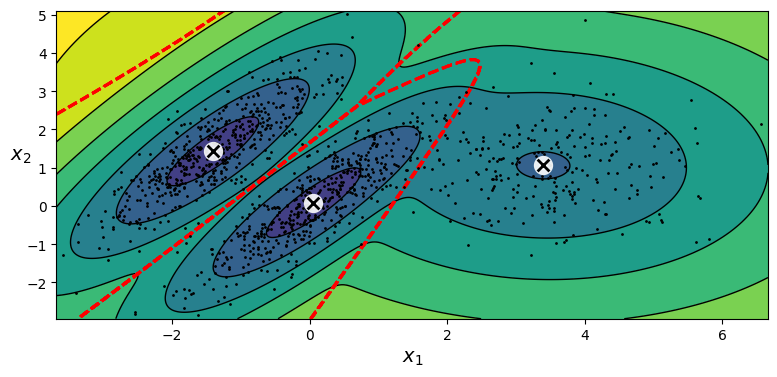

In [106]:
# extra code – this cells generates and saves Figure 9–16

from matplotlib.colors import LogNorm

def plot_gaussian_mixture(clusterer, X, resolution=1000, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = -clusterer.score_samples(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z,
                 norm=LogNorm(vmin=1.0, vmax=30.0),
                 levels=np.logspace(0, 2, 12))
    plt.contour(xx, yy, Z,
                norm=LogNorm(vmin=1.0, vmax=30.0),
                levels=np.logspace(0, 2, 12),
                linewidths=1, colors='k')

    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z,
                linewidths=2, colors='r', linestyles='dashed')
    
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)
    plot_centroids(clusterer.means_, clusterer.weights_)

    plt.xlabel("$x_1$")
    if show_ylabels:
        plt.ylabel("$x_2$", rotation=0)
    else:
        plt.tick_params(labelleft=False)

plt.figure(figsize=(8, 4))

plot_gaussian_mixture(gm, X)

save_fig("gaussian_mixtures_plot")
plt.show()

Cluster means, decision boundaires and density contours of a trained Gaussian mixture model.

When there are many dimensions / clusters or few instances, EM can struggle to converge to the optimal solution, hence need to reduce the difficulty by limiting the number of parameters that the algorithm has to learn, such as the range of shapes and orientations that the clusters can have through imposing constraints on the covariance matrices. Set the `covariance_type` parameter to one of the following

- `"spherical"` -> all clusters must be spherical but can have different diameteres
- `"diag"` -> clusters can take on any ellipsoidal shape of any size, but the ellipsoid's axes must be parallel to the coordinate axes
- `"tied"` -> all clusters must have the same ellipsoidal shape, size and orinetation (all clusters share the same covariance matrix)

By default this hyperparameter is `"full"`, where each cluster can take on any shape, size and orientation.

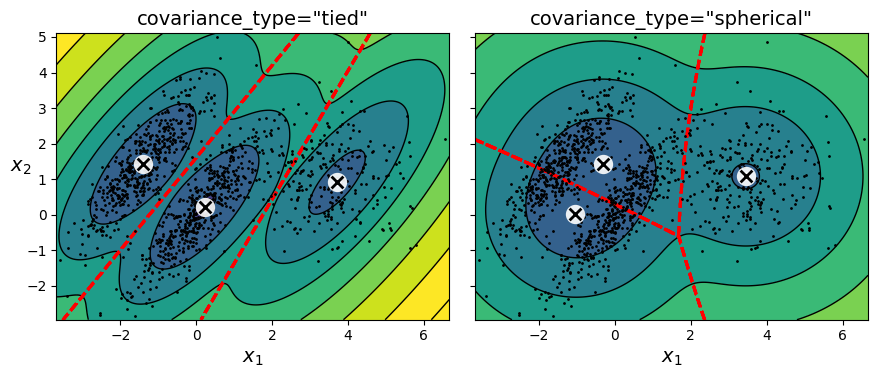

In [107]:
# extra code – this cell generates and saves Figure 9–17

gm_full = GaussianMixture(n_components=3, n_init=10,
                          covariance_type="full", random_state=42)
gm_tied = GaussianMixture(n_components=3, n_init=10,
                          covariance_type="tied", random_state=42)
gm_spherical = GaussianMixture(n_components=3, n_init=10,
                               covariance_type="spherical", random_state=42)
gm_diag = GaussianMixture(n_components=3, n_init=10,
                          covariance_type="diag", random_state=42)
gm_full.fit(X)
gm_tied.fit(X)
gm_spherical.fit(X)
gm_diag.fit(X)

def compare_gaussian_mixtures(gm1, gm2, X):
    plt.figure(figsize=(9, 4))

    plt.subplot(121)
    plot_gaussian_mixture(gm1, X)
    plt.title(f'covariance_type="{gm1.covariance_type}"')

    plt.subplot(122)
    plot_gaussian_mixture(gm2, X, show_ylabels=False)
    plt.title(f'covariance_type="{gm2.covariance_type}"')

compare_gaussian_mixtures(gm_tied, gm_spherical, X)

save_fig("covariance_type_plot")
plt.show()

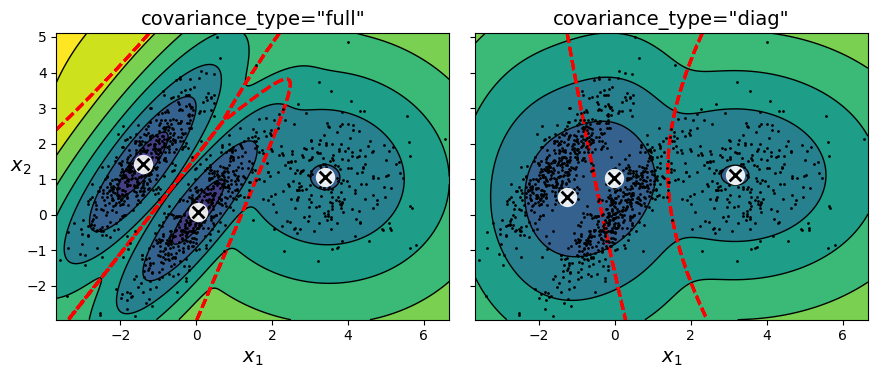

In [108]:
# extra code – comparing covariance_type="full" and covariance_type="diag"
compare_gaussian_mixtures(gm_full, gm_diag, X)
plt.tight_layout()
plt.show()

The computational complexity of training a GaussianMixture model depends on the number of instances m, the number of dimensions n, the number of clusters k, and the constraints on the covariance matrices. 

If covariance_type is "spherical" or "diag", it is O(kmn), assuming the data has a clustering structure.

If covariance_type is "tied" or "full", it is O(kmn2 + kn3), so it will not scale to large numbers of features.

### Using GM for Anomaly Detection

Gaussian Mixtures can be used for _anomaly detection_: instances located in low-density regions can be considered anomalies. You must define what density threshold you want to use. For example, in a manufacturing company that tries to detect defective products, the ratio of defective products is usually well-known. Say it is equal to 2%, then you can set the density threshold to be the value that results in having 2% of the instances located in areas below that threshold density:

In [109]:
densities = gm.score_samples(X)
density_threshold = np.percentile(densities, 2)
anomalies = X[densities < density_threshold]

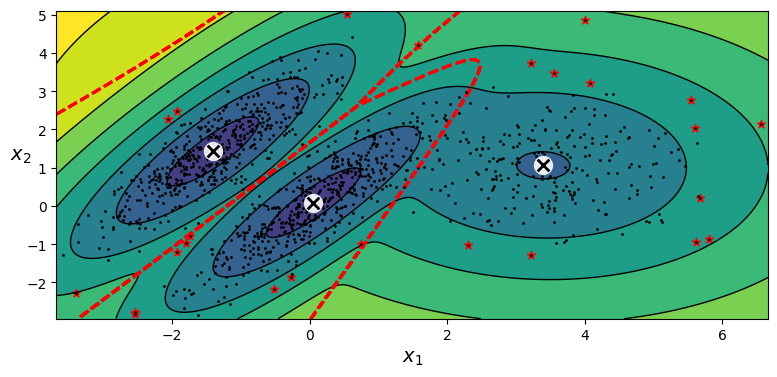

In [110]:
# extra code – this cell generates and saves Figure 9–18

plt.figure(figsize=(8, 4))

plot_gaussian_mixture(gm, X)
plt.scatter(anomalies[:, 0], anomalies[:, 1], color='r', marker='*')
plt.ylim(top=5.1)

save_fig("mixture_anomaly_detection_plot")
plt.show()

Another task is *novelty detection* where the algorithm is assumed to be trained on a "clean" dataset, uncontaimnated by outliers, whereas anomaly detection does not make this assumption.

### Selecting the Number of Clusters

With GMM, find the number of clusters that minimizes the *theoretical information criterion*, such as the *Bayesian information criterion* (BIC) or the *Akaike information criterion* (AIC). 


BIC = log (m) p − 2 log (ℒ) <br>
AIC = 2p − 2 log (ℒ)

In these equations:
• m is the number of instances, as always.
• p is the number of parameters learned by the model.
• ℒ is the maximized value of the likelihood function of the model.

Both these criterion penalizes models that have more parameters to learn and reward models that fits the data well (often end up selecting the same model). When they differ, the model selected by BIC is usually simpler (fewer parameters) but tends not to fit the data as well.


Note: The PDF is a function of x (with θ fixed), while the likelihood function is a function of θ (with x fixed). It is important to understand that the likelihood function is not a probability distribution: if you integrate a probability distribution over all possible values of x, you always get 1, but if you integrate the likelihood function over all possible values of θ the result can be any positive value.

In [113]:
# extra code – bonus material
n_clusters = 3
n_dims = 2
n_params_for_weights = n_clusters - 1
n_params_for_means = n_clusters * n_dims
n_params_for_covariance = n_clusters * n_dims * (n_dims + 1) // 2
n_params = n_params_for_weights + n_params_for_means + n_params_for_covariance
max_log_likelihood = gm.score(X) * len(X) # log(L^)
bic = np.log(len(X)) * n_params - 2 * max_log_likelihood
aic = 2 * n_params - 2 * max_log_likelihood
print(f"bic = {bic}")
print(f"aic = {aic}")
print(f"n_params = {n_params}")

bic = 8189.733705221638
aic = 8102.5084251066
n_params = 17


In [111]:
gm.bic(X)

np.float64(8189.733705221638)

In [112]:
gm.aic(X)

np.float64(8102.5084251066)

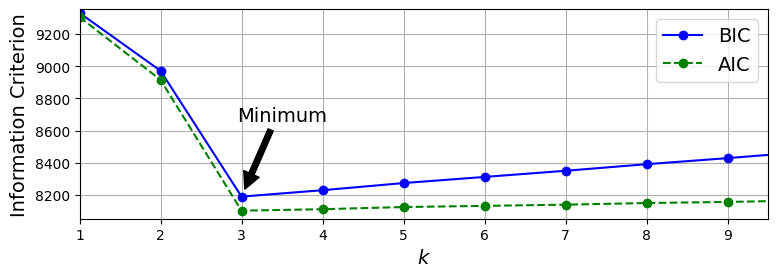

In [114]:
# extra code – this cell generates and saves Figure 9–20

gms_per_k = [GaussianMixture(n_components=k, n_init=10, random_state=42).fit(X)
             for k in range(1, 11)]
bics = [model.bic(X) for model in gms_per_k]
aics = [model.aic(X) for model in gms_per_k]

plt.figure(figsize=(8, 3))
plt.plot(range(1, 11), bics, "bo-", label="BIC")
plt.plot(range(1, 11), aics, "go--", label="AIC")
plt.xlabel("$k$")
plt.ylabel("Information Criterion")
plt.axis([1, 9.5, min(aics) - 50, max(aics) + 50])
plt.annotate("", xy=(3, bics[2]), xytext=(3.4, 8650),
             arrowprops=dict(facecolor='black', shrink=0.1))
plt.text(3.5, 8660, "Minimum", horizontalalignment="center")
plt.legend()
plt.grid()
save_fig("aic_bic_vs_k_plot")
plt.show()

As seen above, the AIC and BIC is minimum for k = 3, so this is most likely the best choice.

### Bayesian Gaussian Mixture Models

Use `BayesianGaussianMixture` class to automatically search for the optimal number of clusters as it is capable of giving weights equal (or close) to 0 to unnecessary clusters. Just set the `n_components` parameter to a value that is greater than the optimal number of clusters (assuming minimal knowledge about the problem).

In [115]:
from sklearn.mixture import BayesianGaussianMixture

bgm = BayesianGaussianMixture(n_components=10, n_init=10, random_state=42)
bgm.fit(X)
bgm.weights_.round(2)

/Users/kevinkyhalim/ML_repo/.venv/lib/python3.12/site-packages/sklearn/mixture/_base.py:269: ConvergenceWarning: Best performing initialization did not converge. Try different init parameters, or increase max_iter, tol, or check for degenerate data.
  warnings.warn(


array([0.4 , 0.21, 0.  , 0.4 , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ])

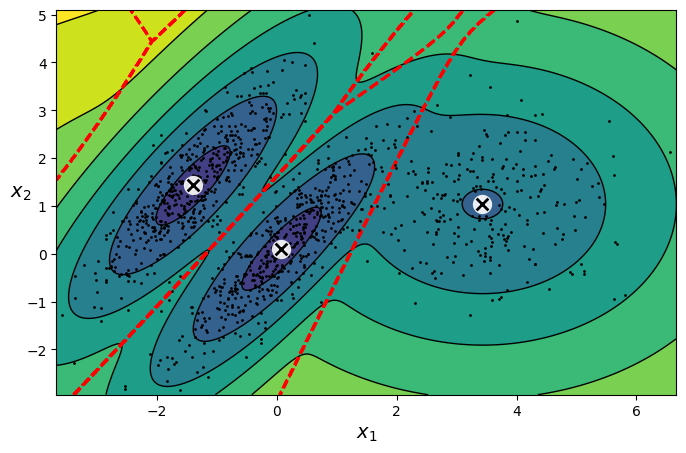

In [116]:
# extra code – this figure is almost identical to Figure 9–16
plt.figure(figsize=(8, 5))
plot_gaussian_mixture(bgm, X)
plt.show()

GMM works great on clusters with ellipsoidal shapes, BUT NOT for those with very different shapes (seen below).

/Users/kevinkyhalim/ML_repo/.venv/lib/python3.12/site-packages/sklearn/mixture/_base.py:269: ConvergenceWarning: Best performing initialization did not converge. Try different init parameters, or increase max_iter, tol, or check for degenerate data.
  warnings.warn(


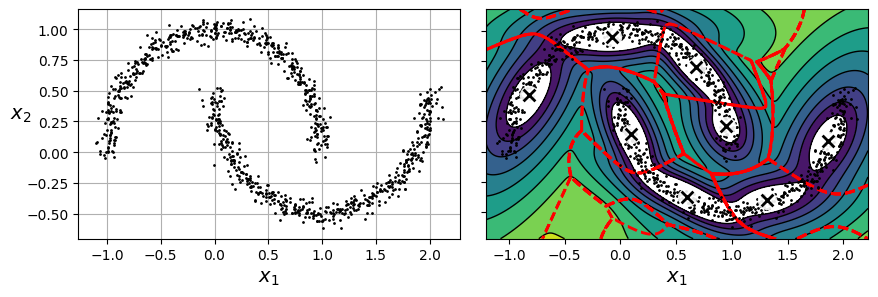

In [117]:
# extra code – this cell generates and saves Figure 9–21

X_moons, y_moons = make_moons(n_samples=1000, noise=0.05, random_state=42)

bgm = BayesianGaussianMixture(n_components=10, n_init=10, random_state=42)
bgm.fit(X_moons)

plt.figure(figsize=(9, 3.2))

plt.subplot(121)
plot_data(X_moons)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$", rotation=0)
plt.grid()

plt.subplot(122)
plot_gaussian_mixture(bgm, X_moons, show_ylabels=False)

save_fig("moons_vs_bgm_plot")
plt.show()

# Other Algorithms for Anomaly and Novelty Detection

- Fast-MCD (minimum covariance determinant) <br>
Under `EllipticEnvelope` class, useful for outlier detection (especially to clean up a dataset). It assumes that the normal instances (inliers) are generated from a single Gaussian distribution and that the dataset is contaminated with ouliers that were not generated from this Gaussian distribution. Gives better estimation of the elliptic envelop and makes the algorithm better at identifying the outliers.

- Isolation forest <br>
For outlier detection, especially in high-dimensional datasets. It builds a random forest where each DT is grown randomly and at each node, it picks a feature randomly and also picks a random threshold value to split the dataset in 2. Anomalies are usually far from other instances, so on average (across all DT) they tend to get isolated in fewer steps than normal instances.

- Local Outlier Factor (LOF) <br>
For outlier detection, comparing the density of instances around a given instance to the density around its neighbors. An anomlay is often more isolated than its k-nearest neighbors.

- One-class SVM <br>
Better suited for novelty detection (assuming that the dataset is clean). Tries to separate the instances in high-dimensional space from the origin. In the original space, it will correspond to finding a small region that encompasses all the instances. If a new instance does not fall within this region, it is an anomaly. Hyperparameters to tweak are kernelized SVM and margin (probability of a new instance being mistakenly considered as novel). Works great for high dimensional dataset but does not scale well to large datasets.

- PCA and other dimensionality reduction techniques with an inverse_transform() method <br>
Comparing the reconstruction error of a normal instance with the reconstruction error of an anomaly (the latter will usually be much larger).



# Exercises

# 1. How would you define clustering? Can you name a few clustering algorithms?

Grouping similar instances together, similarity can be measured by distance.Usually, it will result in clusters where the intra cluster distance is minimized and the inter cluster distances is maximized.

Algorithms: k-means, DBSCAN, Gaussian Mixture Model, BIRCH, agglomerative clustering, mean-shift affinity propagation, spectral clustering etc.

# 2. What are some of the main applications of clustering algorithms?

- Data analysis
- Image segmentation
- Anomaly &/ novelty detection
- Customer segmentation
- Feature engineering
- Semi-supervised learning
- Dimensionality reduction
- Search engines
- Recommender systems

# 3. Describe two techniques to select the right number of clusters when using k-means.

- Compute and plot the inertia of all clusters as a function of number of clusters (k) and find the "elbow" where the decrease is not as significant

- Using the silhoutte diagram and try to find the k clusters where each cluster silhoutte score is mostly above average and the distribution of number of instances under each cluster is roughly equal

# 4. What is label propagation? Why would you implement it, and how?

Using the labels generated from the clustering algorithm to label other unlabeled data.

It is implemented to help increase the accuracy of the supervised model (when doing semi-supervised modeling) and can be done  by using a clustering algorithm such as K-Means on all the instances, then for ecah cluster find the most common label or the label of the most representative instance (closes to the centroid) and propagate the label to the unlabeled instances in the same cluster.

# 5. Can you name two clustering algorithms that can scale to large datasets? And two that look for regions of high density?

Large Datasets:
- K-Means
- BIRCH (since the dataset is loaded in batches), but dataset cannot have too many features

Regions of high density
- Mean-shift
- DBSCAN

# 6. Can you think of a use case where active learning would be useful? How would you implement it?


When there are many instances that are not labeled and that labeling is costly.

A common approach is called *uncertainty sampling*.

# 7. What is the difference between anomaly detection and novelty detection?


Anomaly detection is assumed that there are outliers in the dataset and that the goal is to identify these outliers among the training set as well as new instances (using isolation forest), while novelty detection assumes that the dataset is "clean" and is done to detect novelties strictly in new instances (e.g. one-class SVM)

# 8. What is a Gaussian mixture? What tasks can you use it for?

A probabilistic model that assumes that instances are generated from a mixture of several Gaussian distributions of which their parameters are unknown. Meaning that the data is grouped into a finite number of clusters with ellipsoidal shape (with its own shape, size, density and orientation) and we don't know which cluster each instance belong to.

Used for density estimation, anomaly detection and clustering.

# 9. Can you name two techniques to find the right number of clusters when using a Gaussian mixture model?


1. By minimizing the the information criterion BIC and AIC and also graphing both the AIC and BIC of the clusters as a fuction of number of clusters and finding the number of clusters that has the minimum value.

2. You can also employ the Bayesian Gaussian Mixture model as it has the capability to assign equal or close to 0 for irrelevant clusters.

# 10. The classic Olivetti faces dataset contains 400 grayscale 64 × 64–pixel images of faces.
Each image is flattened to a 1D vector of size 4,096. Forty different people were photographed (10 times each), and the usual task is to train a model that can predict which person is represented in each picture. 
- Load the dataset using the sklearn.datasets.fetch_olivetti_faces() function, then split it into a training set, a validation set, and a test set (note that the dataset is already scaled between 0 and 1).  Since the dataset is quite small, you will probably want to use stratified sampling to ensure that there are the same number of images per person in each set.
- Next, cluster the images using k-means, and ensure that you have a good number of clusters (using one of the techniques discussed in this chapter). Visualize the clusters: do you see similar faces in each cluster?

In [118]:
from sklearn.datasets import fetch_olivetti_faces

olivetti = fetch_olivetti_faces()

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /Users/kevinkyhalim/scikit_learn_data


In [119]:
print(olivetti.DESCR)

.. _olivetti_faces_dataset:

The Olivetti faces dataset
--------------------------

`This dataset contains a set of face images`_ taken between April 1992 and
April 1994 at AT&T Laboratories Cambridge. The
:func:`sklearn.datasets.fetch_olivetti_faces` function is the data
fetching / caching function that downloads the data
archive from AT&T.

.. _This dataset contains a set of face images: https://cam-orl.co.uk/facedatabase.html

As described on the original website:

    There are ten different images of each of 40 distinct subjects. For some
    subjects, the images were taken at different times, varying the lighting,
    facial expressions (open / closed eyes, smiling / not smiling) and facial
    details (glasses / no glasses). All the images were taken against a dark
    homogeneous background with the subjects in an upright, frontal position
    (with tolerance for some side movement).

**Data Set Characteristics:**

=================   =====================
Classes              

In [120]:
dir(olivetti)

['DESCR', 'data', 'images', 'target']

In [121]:
olivetti.target

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13,
       13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18,
       18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 22,
       22, 22, 22, 22, 22

In [125]:
olivetti.data[0].shape

(4096,)

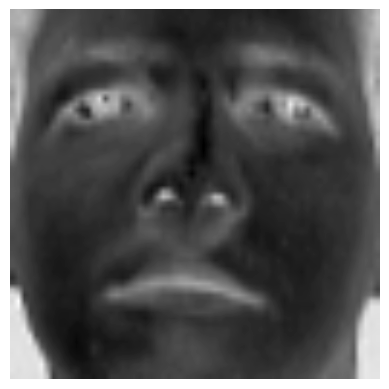

In [131]:
plt.imshow(olivetti.data[6].reshape(64, 64), cmap='binary',
            interpolation="bilinear")
plt.axis('off')
plt.show()

In [137]:
from sklearn.model_selection import StratifiedShuffleSplit

X = olivetti.data
y = olivetti.target 
strat_split = StratifiedShuffleSplit(n_splits = 1, test_size = 40, random_state=42)
train_valid_idx, test_idx = next(strat_split.split(X, y))
X_train_valid = X[train_valid_idx]
y_train_valid = y[train_valid_idx]
X_test = X[test_idx]
y_test = y[test_idx]


strat_split = StratifiedShuffleSplit(n_splits=1, test_size=80, random_state=43)
train_idx, valid_idx = next(strat_split.split(X_train_valid, y_train_valid))
X_train = X_train_valid[train_idx]
y_train = y_train_valid[train_idx]
X_valid = X_train_valid[valid_idx]
y_valid = y_train_valid[valid_idx]

In [138]:
print(X_train.shape, y_train.shape)
print(X_valid.shape, y_valid.shape)
print(X_test.shape, y_test.shape)

(280, 4096) (280,)
(80, 4096) (80,)
(40, 4096) (40,)


In [140]:
from sklearn.cluster import KMeans

k_range = range(5, 150, 5)
# to store the model of each kmeans ranging from 5 to 145
kmeans_per_k = []
for k in k_range:
    print(f"k={k}")
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(X_train)
    kmeans_per_k.append(kmeans)

k=5
k=10
k=15
k=20
k=25
k=30
k=35
k=40
k=45
k=50
k=55
k=60
k=65
k=70
k=75
k=80
k=85
k=90
k=95
k=100
k=105
k=110
k=115
k=120
k=125
k=130
k=135
k=140
k=145


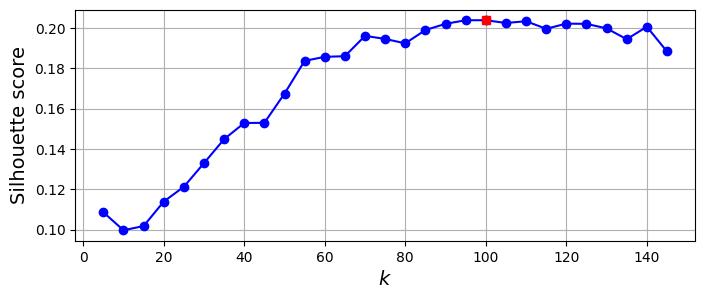

In [ ]:
from sklearn.metrics import silhouette_score

silhouette_scores = [silhouette_score(X_train, model.labels_)
                     for model in kmeans_per_k]
# finds the index where the silhoutte score is the highest
best_index = np.argmax(silhouette_scores)
# assigns the best k as the k with the best_index
best_k = k_range[best_index]
# assigns the best score as the score with the best_index
best_score = silhouette_scores[best_index]

plt.figure(figsize=(8, 3))
plt.plot(k_range, silhouette_scores, "bo-")
plt.xlabel("$k$")
plt.ylabel("Silhouette score")
plt.plot(best_k, best_score, "rs")
plt.grid()
plt.show()

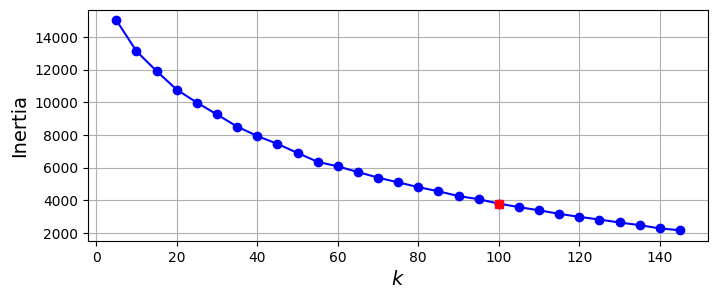

In [142]:
inertias = [model.inertia_ for model in kmeans_per_k]
best_inertia = inertias[best_index]

plt.figure(figsize=(8, 3))
plt.plot(k_range, inertias, "bo-")
plt.xlabel("$k$")
plt.ylabel("Inertia")
plt.plot(best_k, best_inertia, "rs")
plt.grid()
plt.show()


In [143]:
best_model = kmeans_per_k[best_index]

Cluster 0


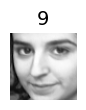

Cluster 1


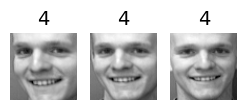

Cluster 2


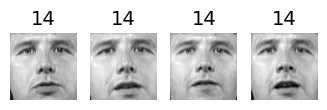

Cluster 3


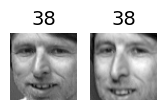

Cluster 4


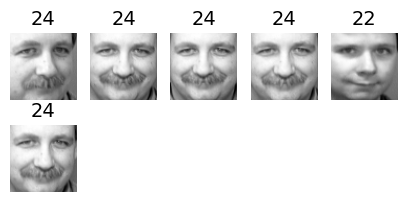

Cluster 5


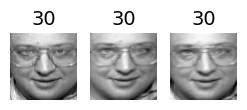

Cluster 6


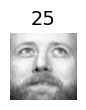

Cluster 7


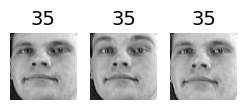

Cluster 8


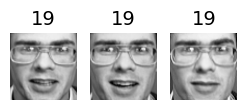

Cluster 9


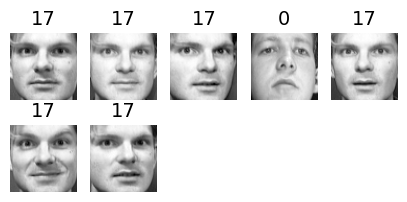

Cluster 10


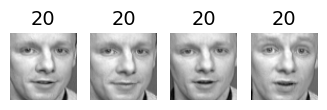

Cluster 11


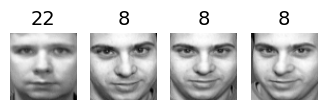

Cluster 12


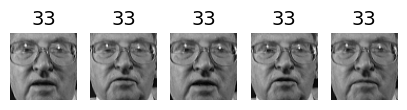

Cluster 13


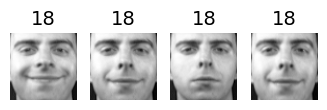

Cluster 14


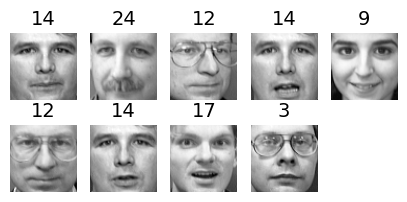

Cluster 15


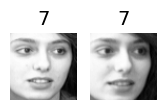

Cluster 16


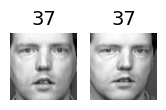

Cluster 17


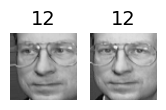

Cluster 18


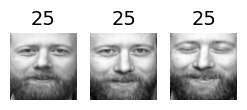

Cluster 19


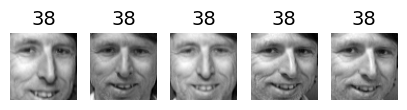

Cluster 20


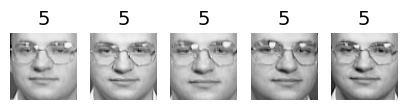

Cluster 21


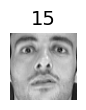

Cluster 22


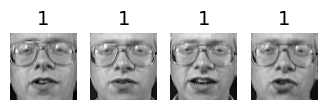

Cluster 23


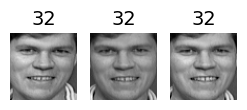

Cluster 24


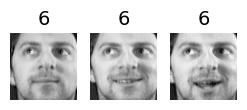

Cluster 25


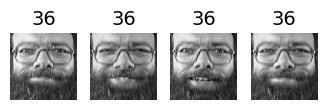

Cluster 26


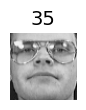

Cluster 27


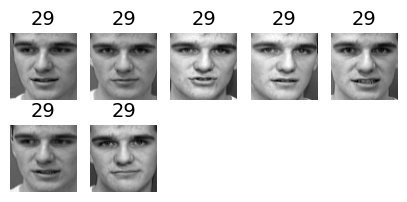

Cluster 28


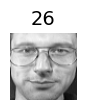

Cluster 29


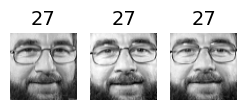

Cluster 30


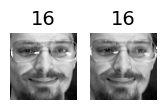

Cluster 31


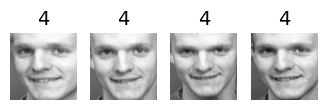

Cluster 32


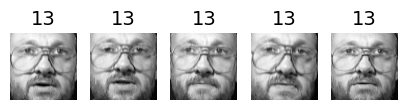

Cluster 33


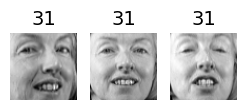

Cluster 34


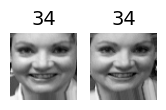

Cluster 35


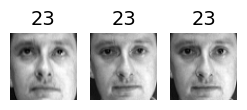

Cluster 36


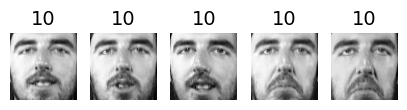

Cluster 37


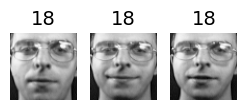

Cluster 38


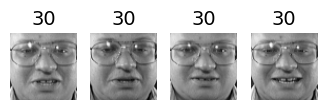

Cluster 39


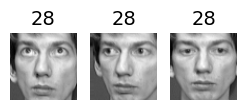

Cluster 40


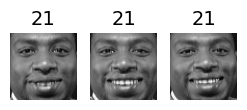

Cluster 41


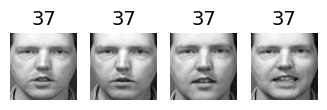

Cluster 42


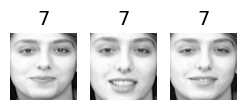

Cluster 43


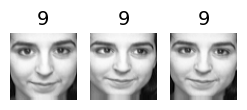

Cluster 44


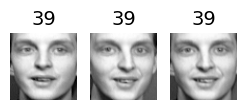

Cluster 45


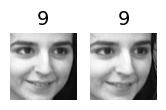

Cluster 46


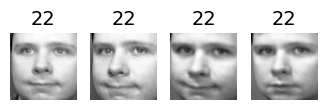

Cluster 47


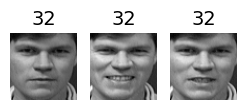

Cluster 48


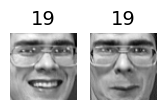

Cluster 49


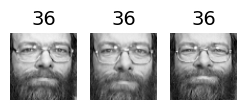

Cluster 50


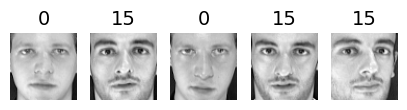

Cluster 51


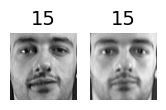

Cluster 52


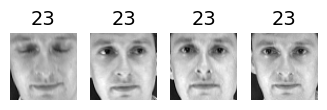

Cluster 53


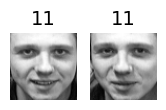

Cluster 54


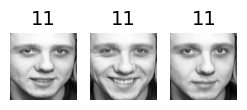

Cluster 55


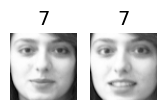

Cluster 56


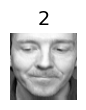

Cluster 57


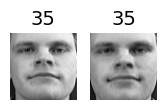

Cluster 58


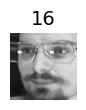

Cluster 59


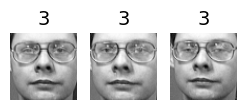

Cluster 60


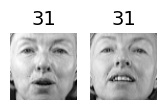

Cluster 61


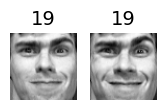

Cluster 62


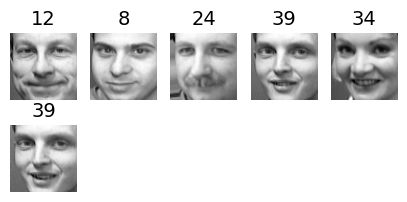

Cluster 63


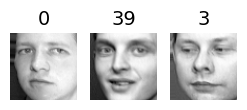

Cluster 64


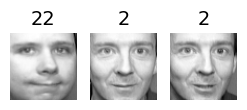

Cluster 65


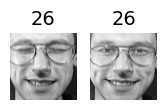

Cluster 66


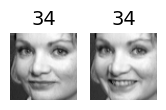

Cluster 67


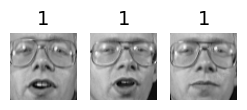

Cluster 68


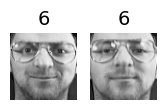

Cluster 69


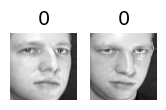

Cluster 70


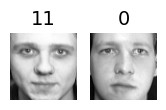

Cluster 71


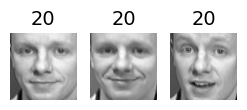

Cluster 72


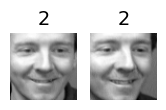

Cluster 73


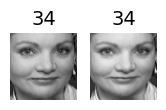

Cluster 74


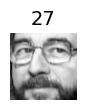

Cluster 75


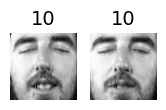

Cluster 76


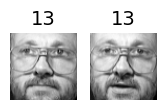

Cluster 77


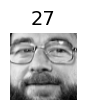

Cluster 78


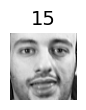

Cluster 79


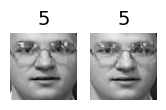

Cluster 80


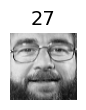

Cluster 81


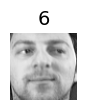

Cluster 82


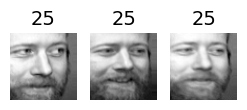

Cluster 83


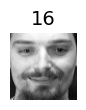

Cluster 84


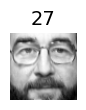

Cluster 85


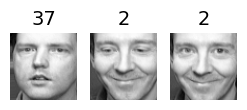

Cluster 86


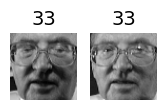

Cluster 87


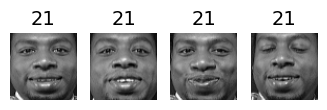

Cluster 88


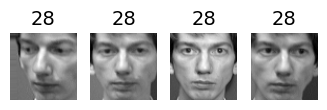

Cluster 89


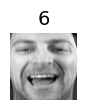

Cluster 90


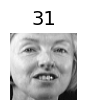

Cluster 91


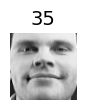

Cluster 92


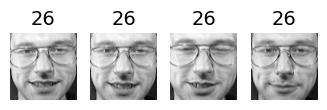

Cluster 93


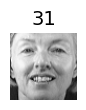

Cluster 94


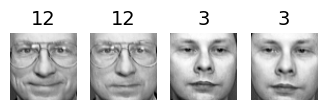

Cluster 95


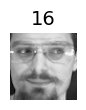

Cluster 96


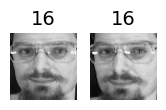

Cluster 97


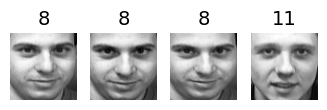

Cluster 98


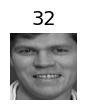

Cluster 99


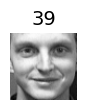

In [144]:
def plot_faces(faces, labels, n_cols=5):
    faces = faces.reshape(-1, 64, 64)
    n_rows = (len(faces) - 1) // n_cols + 1
    plt.figure(figsize=(n_cols, n_rows * 1.1))
    for index, (face, label) in enumerate(zip(faces, labels)):
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(face, cmap="gray")
        plt.axis("off")
        plt.title(label)
    plt.show()

for cluster_id in np.unique(best_model.labels_):
    print("Cluster", cluster_id)
    in_cluster = best_model.labels_==cluster_id
    faces = X_train[in_cluster]
    labels = y_train[in_cluster]
    plot_faces(faces, labels)

# 11. Continuing with the Olivetti faces dataset, train a classifier to predict which person is represented in each picture, and evaluate it on the validation set.
Next, use k-means as a dimensionality reduction tool, and train a classifier on the reduced set. Search for the number of clusters that allows the classifier to get the best performance: what performance can you reach? What if you append the features from the reduced set to the original features (again, searching for the best number of clusters)?


In [145]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=150, random_state=42)
rf_clf.fit(X_train, y_train)
rf_clf.score(X_valid, y_valid)

0.9375

Use the kmeans as a dimensionality reduction and train a classifier on the reduced set.

In [146]:
X_train_reduced = best_model.transform(X_train)
X_valid_reduced = best_model.transform(X_valid)
X_test_reduced = best_model.transform(X_test)

clf = RandomForestClassifier(n_estimators=150, random_state=42)
clf.fit(X_train_reduced, y_train)
 
clf.score(X_valid_reduced, y_valid)

0.8125

Since using the best model did not help, let's try to use a pipeline to explore the scores of the validation set based on the different clusters.

In [147]:
from sklearn.pipeline import make_pipeline

for n_clusters in k_range:
    pipeline = make_pipeline(
        KMeans(n_clusters=n_clusters, n_init=10, random_state=42),
        RandomForestClassifier(n_estimators=150, random_state=42)
    )
    pipeline.fit(X_train, y_train)
    print(n_clusters, pipeline.score(X_valid, y_valid))

5 0.5125
10 0.675
15 0.7125
20 0.725
25 0.7875
30 0.7625
35 0.75
40 0.775
45 0.7875
50 0.8
55 0.7875
60 0.8125
65 0.8
70 0.825
75 0.8125
80 0.8125
85 0.8
90 0.7875
95 0.8
100 0.8125
105 0.8
110 0.7875
115 0.8125
120 0.8375
125 0.8125
130 0.825
135 0.825
140 0.775
145 0.85


# 12. Train a Gaussian mixture model on the Olivetti faces dataset.
To speed up the algorithm, you should probably reduce the dataset’s dimensionality (e.g., use PCA, preserving 99% of the variance). Use the model to generate some new faces (using the sample() method), and visualize them (if you used PCA, you will need to use its inverse_transform() method).

In [148]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=40, random_state=42)
y_pred = gm.fit_predict(X_train)

In [149]:
n_gen_faces = 20
gen_faces, y_gen_faces = gm.sample(n_samples = n_gen_faces)

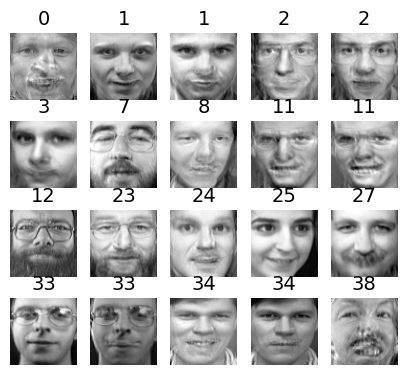

In [150]:
plot_faces(gen_faces, y_gen_faces)

 Try to modify some images (e.g., rotate, flip, darken) and see if the model can detect the anomalies (i.e., compare the output of the score_samples() method for normal images and for anomalies).

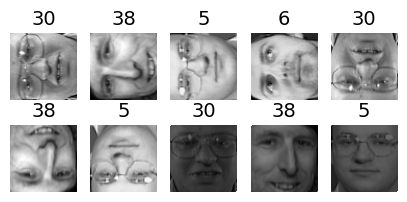

In [151]:
n_rotated = 4
rotated = np.transpose(X_train[:n_rotated].reshape(-1, 64, 64), axes=[0, 2, 1])
rotated = rotated.reshape(-1, 64*64)
y_rotated = y_train[:n_rotated]

n_flipped = 3
flipped = X_train[:n_flipped].reshape(-1, 64, 64)[:, ::-1]
flipped = flipped.reshape(-1, 64*64)
y_flipped = y_train[:n_flipped]

n_darkened = 3
darkened = X_train[:n_darkened].copy()
darkened[:, 1:-1] *= 0.3
y_darkened = y_train[:n_darkened]

X_bad_faces = np.r_[rotated, flipped, darkened]
y_bad = np.concatenate([y_rotated, y_flipped, y_darkened])

plot_faces(X_bad_faces, y_bad)

In [ ]:
gm.score_samples(X_bad_faces)

# 13. Some dimensionality reduction techniques can also be used for anomaly detection.
For example, take the Olivetti faces dataset and reduce it with PCA, preserving 99% of the variance. Then compute the reconstruction error for each image. Next, take some of the modified images you built in the previous exercise and look at their reconstruction error: notice how much larger it is. If you plot a reconstructed image, you will see why: it tries to reconstruct a normal face.

In [152]:
from sklearn.decomposition import PCA

pca = PCA(0.99)
X_train_pca = pca.fit_transform(X_train)
X_valid_pca = pca.transform(X_valid)
X_test_pca = pca.transform(X_test)

pca.n_components_

np.int64(199)

In [153]:
def reconstruction_errors(pca, X):
    X_pca = pca.transform(X)
    X_reconstructed = pca.inverse_transform(X_pca)
    mse = np.square(X_reconstructed - X).mean(axis=-1)
    return mse

In [154]:
reconstruction_errors(pca, X_train).mean()

np.float32(0.00019205351)

Notice how much the error increased! by a factor of 40!

In [155]:
reconstruction_errors(pca, X_bad_faces).mean()

np.float32(0.004707354)

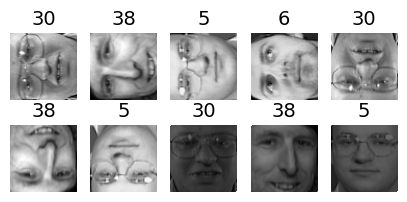

In [156]:
plot_faces(X_bad_faces, y_bad)

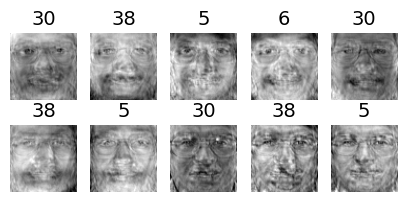

In [157]:
X_bad_faces_pca = pca.transform(X_bad_faces)
X_bad_faces_reconstructed = pca.inverse_transform(X_bad_faces_pca)
plot_faces(X_bad_faces_reconstructed, y_bad)